In [1]:
%matplotlib inline
import os
import dlib
import face_recognition
import numpy as np
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow

# 影像切割

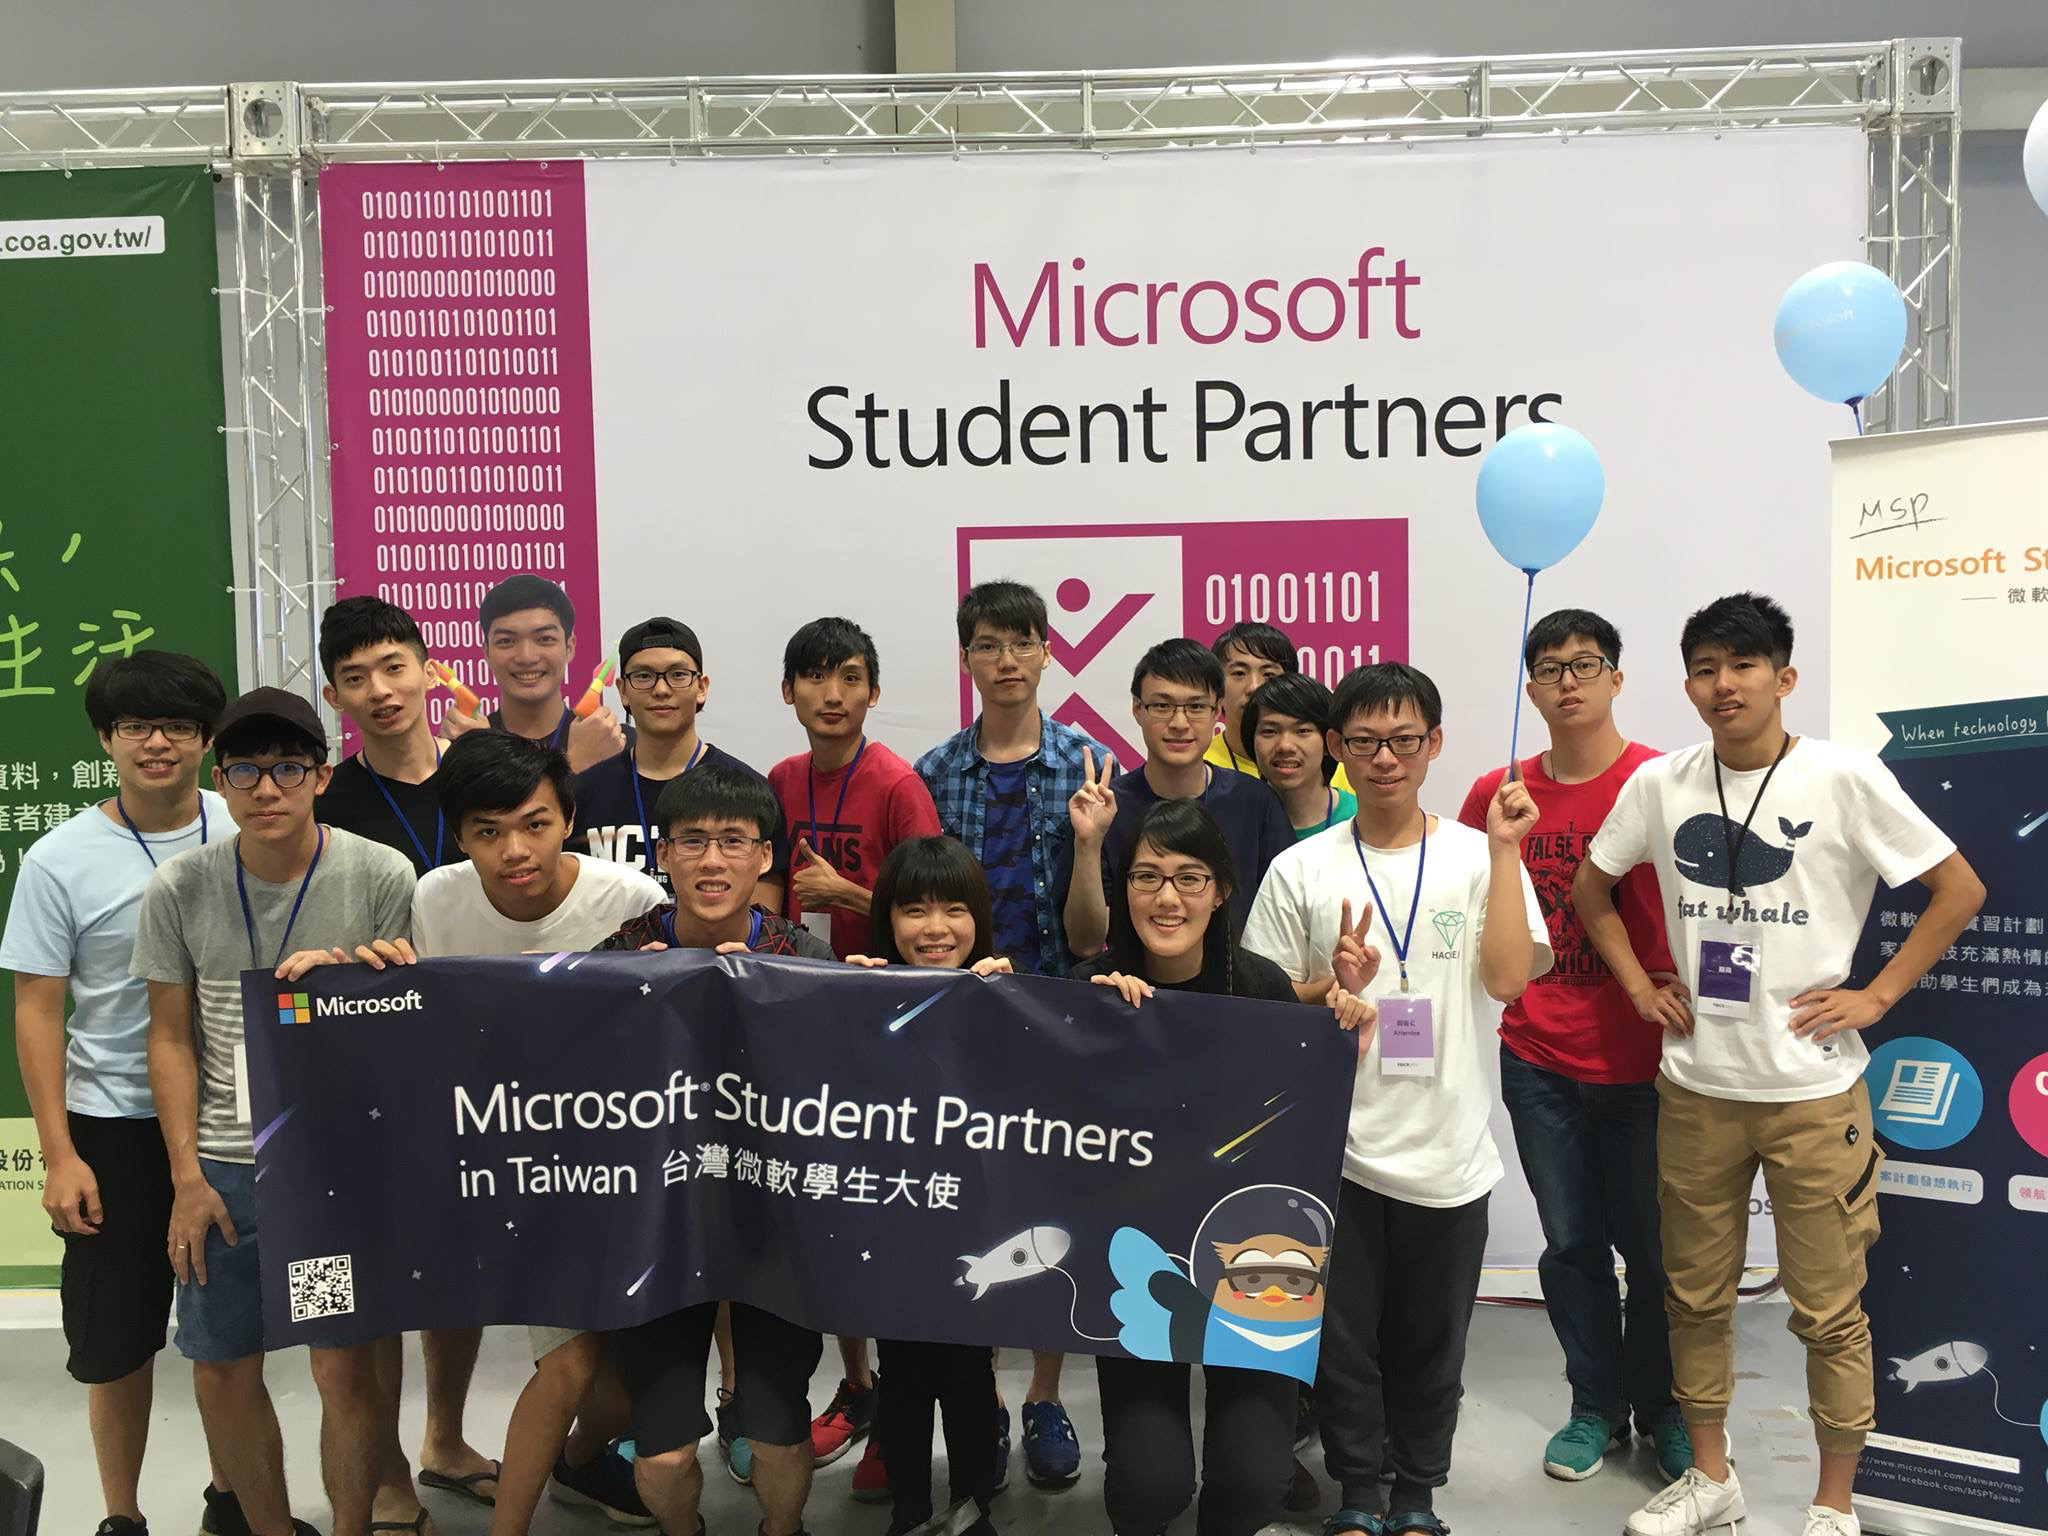

In [3]:
msp12 = Image.open('datasets/test_data/msp12.jpg')
msp12

In [4]:
def face_dectect(path):    
    image = face_recognition.load_image_file(path)
    face_locations = face_recognition.face_locations(image, number_of_times_to_upsample = 0, model="cnn")
    print("{} face in the photograph.".format(len(face_locations)))
    fig = plt.gcf()
    fig.set_size_inches(20, 20)
    for face_location, i in zip (face_locations, range(len(face_locations))):
        top, right, bottom, left = face_location
        print("top: {}, left: {}, bottom: {}, right: {}".format(top, left, bottom, right))
        face_image = image[top:bottom, left:right]
        pil_image = Image.fromarray(face_image)
        ax = plt.subplot(10, 10, 1 + i)
        ax.imshow(np.asarray(pil_image))
    plt.show()

17 face in the photograph.
top: 636, left: 331, bottom: 730, right: 426
top: 876, left: 878, bottom: 970, right: 973
top: 612, left: 484, bottom: 691, right: 563
top: 644, left: 620, bottom: 723, right: 699
top: 700, left: 1244, bottom: 779, right: 1323
top: 626, left: 1675, bottom: 721, right: 1770
top: 684, left: 110, bottom: 778, right: 205
top: 652, left: 788, bottom: 731, right: 867
top: 612, left: 964, bottom: 691, right: 1043
top: 726, left: 213, bottom: 839, right: 327
top: 799, left: 465, bottom: 894, right: 560
top: 818, left: 657, bottom: 913, right: 752
top: 684, left: 1132, bottom: 763, right: 1211
top: 847, left: 1118, bottom: 942, right: 1213
top: 693, left: 1339, bottom: 788, right: 1434
top: 636, left: 1532, bottom: 715, right: 1611
top: 644, left: 1212, bottom: 723, right: 1291


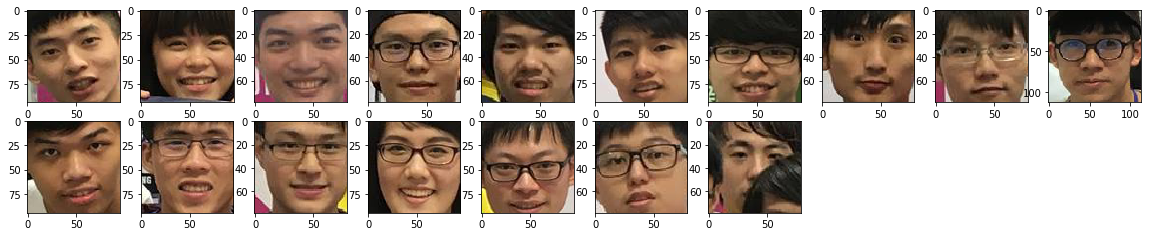

In [4]:
face_dectect('datasets/msp12/msp12.jpg')

In [5]:
def face_rotate(path):
    img = Image.open(path).rotate(270)
    return img

In [6]:
def face_encode(path):
    try:
        face_encoding = face_recognition.face_encodings(np.array(Image.open(path)))[0]
        return face_encoding
    except:
        face_encoding = face_recognition.face_encodings(np.array(face_rotate(path)))[0]
        return face_encoding

In [7]:
def face_compare(face_encoding1, face_encoding2):
    result = face_recognition.compare_faces(face_encoding1, face_encoding2, tolerance = 0.4)
    return result

In [15]:
pic_list = os.listdir("datasets\msp12")
pic_dict = {}
for i in range(len(pic_list)):
    temp = pic_list[i].split(".")[0]
    pic_dict[i] = temp

In [16]:
pic_dict

{0: 'jade',
 1: '余柏序',
 2: '修炎',
 3: '劉亦恩',
 4: '周逸',
 5: '孫凡耘',
 6: '廖梵儒',
 7: '徐佳筠',
 8: '徐英愷',
 9: '林宗毅',
 10: '林恆邵',
 11: '林穎平',
 12: '梁舒翔',
 13: '游政諺',
 14: '蔡旻袁',
 15: '蕭擎軒',
 16: '鍾竣評',
 17: '陳怡涵',
 18: '陳瑜',
 19: '黃嵩仁'}

In [17]:
np.save("pic_dict.npy", pic_dict)

In [18]:
img_list = []
for i in pic_list:
    file_name = "datasets\msp12" + "/" + i
    img_list.append(face_encode(file_name))

In [19]:
np.save("img_list.npy",img_list)

In [20]:
def face_dectect_1(path):    
    fig = plt.gcf()
    fig.set_size_inches(20, 20)
    image = face_recognition.load_image_file(path)
    face_locations = face_recognition.face_locations(image, number_of_times_to_upsample = 0, model="cnn")
    for face_location, i in zip (face_locations, range(len(face_locations))):
        top, right, bottom, left = face_location
        print("top: {}, left: {}, bottom: {}, right: {}".format(top, left, bottom, right))
        face_image = image[top:bottom, left:right]
        pil_image = Image.fromarray(face_image)
        ax = plt.subplot(10, 10, 1 + i)
        ax.imshow(np.asarray(pil_image))
        try:
            face_encoding = face_recognition.face_encodings(np.array(pil_image))[0]
        except:
            try:
                face_encoding = face_recognition.face_encodings(np.array(pil_image.rotate(270)))[0]
            except:
                continue
        result = face_compare(img_list, face_encoding)
        for j in range(len(img_list)):
            if result[j] == True:
#                 ax.imshow(np.asarray(pil_image))
                title = str(j) + "," + pic_dict[j]
                ax.set_title(title, fontsize = 10)
    plt.show()

top: 636, left: 331, bottom: 730, right: 426
top: 876, left: 878, bottom: 970, right: 973
top: 612, left: 484, bottom: 691, right: 563
top: 644, left: 620, bottom: 723, right: 699
top: 700, left: 1244, bottom: 779, right: 1323
top: 626, left: 1675, bottom: 721, right: 1770
top: 684, left: 110, bottom: 778, right: 205
top: 652, left: 788, bottom: 731, right: 867
top: 612, left: 964, bottom: 691, right: 1043
top: 726, left: 213, bottom: 839, right: 327
top: 799, left: 465, bottom: 894, right: 560
top: 818, left: 657, bottom: 913, right: 752
top: 684, left: 1132, bottom: 763, right: 1211
top: 847, left: 1118, bottom: 942, right: 1213
top: 693, left: 1339, bottom: 788, right: 1434
top: 636, left: 1532, bottom: 715, right: 1611
top: 644, left: 1212, bottom: 723, right: 1291


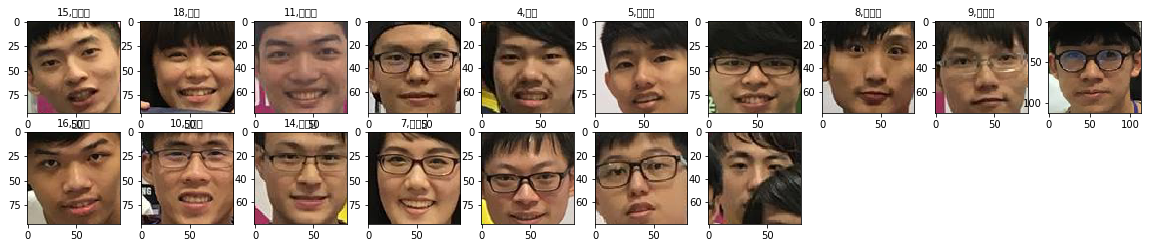

In [21]:
face_dectect_1("datasets/test_data/msp12.JPG")